In [1]:
#いろいろインポート
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

#データ読み込み
df = pd.read_csv("3-3_TS_sample2.csv",index_col="年月日",encoding="shift_jis",parse_dates=True)

In [2]:
df

,平均気温(℃),降水量の合計(mm),日照時間(時間)
年月日,,,
2010-01-01,4.8,0.0,9.2
2010-01-02,6.3,0.0,9.0
2010-01-03,5.7,0.0,6.6
2010-01-04,6.5,0.0,5.2
2010-01-05,7.3,2.5,8.1
...,...,...,...
2019-12-27,8.7,0.5,6.5
2019-12-28,6.8,0.0,8.8
2019-12-29,7.0,0.0,8.3


In [5]:
#statsmodelsのバージョンは0.8.0以降にしましょう 
#(コマンド)conda install -c taugspurger statsmodels=0.8.0
import statsmodels.api as sm 

y = df["平均気温(℃)"]
arma_model = sm.tsa.ARMA(y, order=(3, 1),freq="D")
result = arma_model.fit()

result.summary()

c:\Users\hahih\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                平均気温(℃)   No. Observations:                 3652
Model:                     ARMA(3, 1)   Log Likelihood               -7687.144
Method:                       css-mle   S.D. of innovations              1.985
Date:                Sun, 29 May 2022   AIC                          15386.289
Time:                        23:58:08   BIC                          15423.507
Sample:                    01-01-2010   HQIC                         15399.543
                         - 12-31-2019                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.4991      2.683      5.777      0.000      10.241      20.757
ar.L1.平均気温(℃)     1.6012      0.023     70.658      0.000       1.557       1.646
ar.L2.平均気温(℃)    -0.7565      0.030    -25.425      0.000      -0.815      -0.698
ar.L3.平均気温(℃)     0.1529      0.018      8.624      0.000       0.118       0.188
ma.L1.平均気温(℃)    -0.7947      0.017    -46.927      0.000      -0.828      -0.762
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0044           -0.0000j            1.0044           -0.0000
AR.2            1.9712           -1.6202j            2.5516           -0.1095
AR.3            1.9712           +1.6202j            2.5516            0.1095
MA.1            1.2583           +0.0000j            1.2583            0.0000
-----------------------------------------------------------------------------
"""

In [4]:
sm.tsa.arma_order_select_ic(df["平均気温(℃)"], ic='aic')

c:\Users\hahih\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


{'aic':               0             1             2
 0  25653.397308  21825.923108  19726.214028
 1  15770.002959  15738.492487  15455.700659
 2  15753.635864  15456.251454  15386.921420
 3  15594.912148  15386.288944  15387.940696
 4  15544.891241  15388.159786  15388.993009,
 'aic_min_order': (3, 1)}

In [6]:
#　月ごとに集計したデータも準備しておく
df_month = df["2010":"2018"].resample("M").mean()
df_month_all = df["2010":"2019"].resample("M").mean()

df_month_pred = df["2019"].resample("M").mean()

C:\Users\hahih\AppData\Local\Temp/ipykernel_13196/3797243563.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_month_pred = df["2019"].resample("M").mean()


In [7]:
df_month

,平均気温(℃),降水量の合計(mm),日照時間(時間)
年月日,,,
2010-01-31,7.022581,0.290323,7.158065
2010-02-28,6.500000,4.107143,4.225000
2010-03-31,9.096774,4.629032,4.509677
2010-04-30,12.393333,7.133333,4.663333
2010-05-31,18.951613,3.677419,6.412903
...,...,...,...
2018-08-31,28.061290,2.790323,7.012903
2018-09-30,22.856667,12.166667,3.223333
2018-10-31,19.112903,1.983871,4.483871


In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = df_month['平均気温(℃)']
x = df_month[['降水量の合計(mm)', '日照時間(時間)']]
sarima_model = sm.tsa.SARIMAX(y,x, order=(1, 1, 1),seasonal_order=(0,1,1,12))
result = sarima_model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            平均気温(℃)   No. Observations:                  108
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -141.757
Date:                            Mon, 30 May 2022   AIC                            295.513
Time:                                    00:11:57   BIC                            310.837
Sample:                                01-31-2010   HQIC                           301.705
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
降水量の合計(mm)    -0.0053      0.036     -0.145      0.885      -0.077       0.066
日照時間(時間)       0.3841      0.154      2.490      0.013       0.082       0.687
ar.L1          0.2493      0.119      2.102      0.036       0.017       0.482
ma.L1         -0.9990      2.449     -0.408      0.683      -5.798       3.800
ma.S.L12      -0.9975     12.653     -0.079      0.937     -25.797      23.802
sigma2         0.8256     11.332      0.073      0.942     -21.386      23.037
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.97
Prob(Q):                              0.79   Prob(JB):                         0.37
Heteroskedasticity (H):               0.89   Skew:                             0.31
Prob(H) (two-sided):                  0.74   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
import itertools

p = q = range(0, 3)
sp = sd = sq = range(0, 2)

#p,q,sp,sd,sqの組み合わせのリストを作成する。和分=1,周期=12は固定
pdq = [(x[0], 1, x[1]) for x in list(itertools.product(p, q))]
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(sp, sd, sq))]

In [11]:
import warnings
warnings.filterwarnings("ignore")

best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(y, x, order = param, seasonal_order = param_seasonal)
            results = mod.fit()
            print('ARIMAパラメータ{}, 季節変動パラメータ{} - AIC: {}'.format(param, param_seasonal, results.aic))
            
            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue

print('AIC最小のモデル：', best_result)

ARIMAパラメータ(0, 1, 0), 季節変動パラメータ(0, 0, 0, 12) - AIC: 613.9551631312182
ARIMAパラメータ(0, 1, 0), 季節変動パラメータ(0, 0, 1, 12) - AIC: 528.8431027977542
ARIMAパラメータ(0, 1, 0), 季節変動パラメータ(0, 1, 0, 12) - AIC: 359.2434101630814
ARIMAパラメータ(0, 1, 0), 季節変動パラメータ(0, 1, 1, 12) - AIC: 333.3739094012972
ARIMAパラメータ(0, 1, 0), 季節変動パラメータ(1, 0, 0, 12) - AIC: 427.04786255835467
ARIMAパラメータ(0, 1, 0), 季節変動パラメータ(1, 0, 1, 12) - AIC: 403.08754064164503
ARIMAパラメータ(0, 1, 0), 季節変動パラメータ(1, 1, 0, 12) - AIC: 351.6899032339681
ARIMAパラメータ(0, 1, 0), 季節変動パラメータ(1, 1, 1, 12) - AIC: 334.549955354918
ARIMAパラメータ(0, 1, 1), 季節変動パラメータ(0, 0, 0, 12) - AIC: 560.8256802210408
ARIMAパラメータ(0, 1, 1), 季節変動パラメータ(0, 0, 1, 12) - AIC: 505.9826928197679
ARIMAパラメータ(0, 1, 1), 季節変動パラメータ(0, 1, 0, 12) - AIC: 321.08895893670825
ARIMAパラメータ(0, 1, 1), 季節変動パラメータ(0, 1, 1, 12) - AIC: 306.82164313936073
ARIMAパラメータ(0, 1, 1), 季節変動パラメータ(1, 0, 0, 12) - AIC: 402.18474085649893
ARIMAパラメータ(0, 1, 1), 季節変動パラメータ(1, 0, 1, 12) - AIC: 387.3563131585955
ARIMAパラメータ(0, 1, 1), 季節変動パラメータ

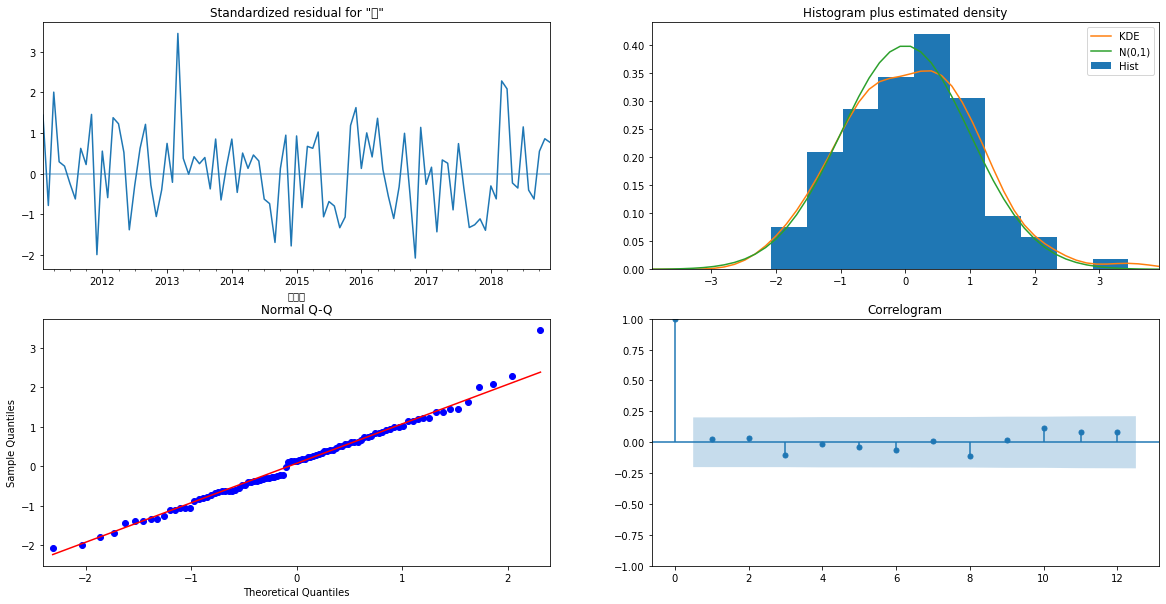

In [13]:
#ホワイトノイズの確認
plt.rc('figure',figsize=(20, 10))
result.plot_diagnostics(lags=12);

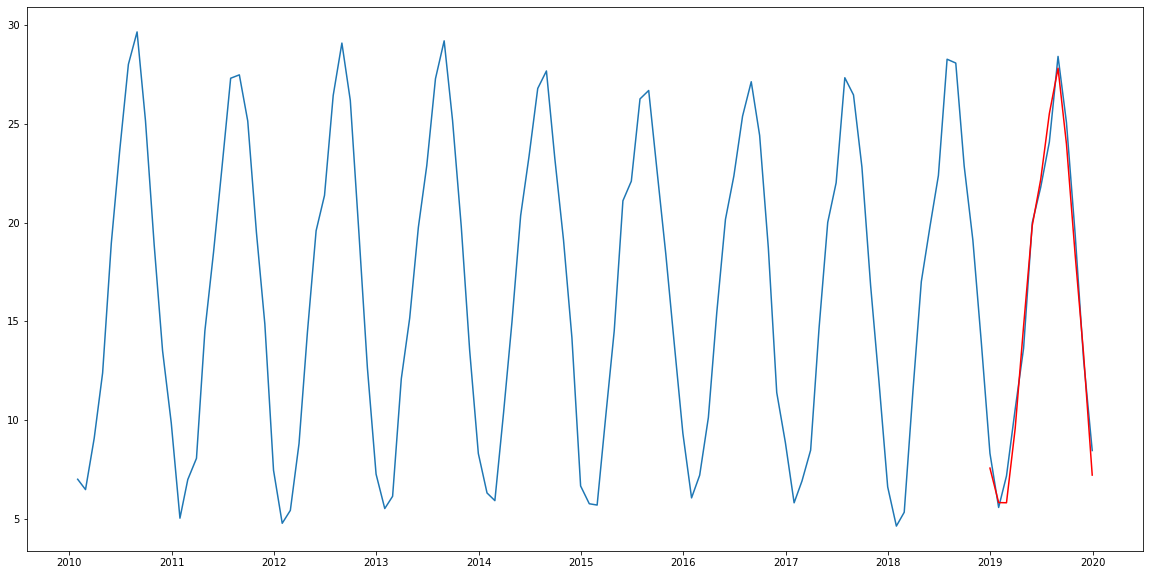

In [14]:
bestPred = result.predict('2018-12', '2019-12',exog=df_month_pred[["降水量の合計(mm)","日照時間(時間)"]])
plt.plot(df_month_all["平均気温(℃)"])
plt.plot(bestPred, "r")

In [15]:
bestPred

2018-12-31     7.585996
2019-01-31     5.843708
2019-02-28     5.833730
2019-03-31     9.583485
2019-04-30    14.758275
2019-05-31    19.846203
2019-06-30    22.163685
2019-07-31    25.506800
2019-08-31    27.799569
2019-09-30    23.975460
2019-10-31    18.384049
2019-11-30    13.380074
2019-12-31     7.232912
Freq: M, Name: predicted_mean, dtype: float64